In [1]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt

In [2]:
np.random.seed(23) # from random.org

# 3.1. Hierarchical GLAM estimation and out of sample prediction

## Load data

In [3]:
# Load data
data = pd.read_csv('data/FF2018_data/GlamDataFF2018_Dislike.csv')
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
0,0,0,1,3327,0,5,0.745415,0.254585
1,0,1,1,3424,5,4,0.410720,0.589280
2,0,2,1,3691,4,1,0.330549,0.669451
3,0,3,0,8144,3,5,0.592345,0.407655
4,0,4,0,6559,5,5,0.641717,0.358283


## Split data in training and test sets -- half

In [4]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

test_data.to_csv('data/FF2018_data/GlamDataFF2018_Dislike_preprocessed_test.csv')
train_data.to_csv('data/FF2018_data/GlamDataFF2018_Dislike_preprocessed_train.csv')

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1980 trials) and test (1980 trials) sets...


## Split data in training and test sets -- 3/4

In [4]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials*3/4)].copy()
    subject_test = subject_data.iloc[np.arange(n_trials*3/4, n_trials)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

test_data.to_csv('data/FF2018_data/GlamDataFF2018_Dislike_preprocessed_test_3_4.csv')
train_data.to_csv('data/FF2018_data/GlamDataFF2018_Dislike_preprocessed_train_3_4.csv')

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1980 trials) and test (1980 trials) sets...


## Hierarchical GLAM estimation

### 1. full GLAM

In [5]:
# Fitting full GLAM
print('Fitting full GLAM hierarchically...')

glam_full = glam.GLAM(train_data)

if not os.path.exists('results/estimates/glam_FF2018_Dislike_full_hierarchical_cv.npy'):
    glam_full.make_model('hierarchical', gamma_bounds=(-1, 1), t0_val=0)
    glam_full.fit(method='ADVI', n_advi=200000)
else:
    print('  Found old parameter estimates in "results/estimates". Skipping estimation...')
    glam_full.estimates = np.load('results/estimates/glam_FF2018_Dislike_full_hierarchical_cv.npy')[()]
    
# Save parameter estimates
np.save('results/estimates/glam_FF2018_Dislike_full_hierarchical_cv.npy', glam_full.estimates)
pd.DataFrame(glam_full.estimates)

Fitting full GLAM hierarchically...
Generating hierarchical model for 33 subjects...
Fitting 1 model(s) using ADVI...
  Fitting model 1 of 1...


Average Loss = 18,103: 100%|██████████| 200000/200000 [21:32<00:00, 154.69it/s]
Finished [100%]: Average Loss = 18,103


/!\ Automatically setting parameter precision...


,SNR,SNR_mu,SNR_sd,b,gamma,gamma_mu,gamma_sd,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,156.86,174.51,23.54,1.0,-0.97,-0.88,0.1,0.05,0.007088,0.0,0.46,1.01,0.64,0.000044,0.000051,0.00001
1,174.38,174.51,23.54,1.0,-0.93,-0.88,0.1,0.05,0.010180,0.0,0.12,1.01,0.64,0.000057,0.000051,0.00001
2,159.18,174.51,23.54,1.0,-0.95,-0.88,0.1,0.05,0.008942,0.0,0.03,1.01,0.64,0.000050,0.000051,0.00001
3,180.38,174.51,23.54,1.0,-0.98,-0.88,0.1,0.05,0.007243,0.0,1.34,1.01,0.64,0.000046,0.000051,0.00001
4,181.67,174.51,23.54,1.0,-0.98,-0.88,0.1,0.05,0.011154,0.0,2.22,1.01,0.64,0.000057,0.000051,0.00001
5,178.83,174.51,23.54,1.0,-0.87,-0.88,0.1,0.05,0.009016,0.0,0.63,1.01,0.64,0.000052,0.000051,0.00001
6,171.03,174.51,23.54,1.0,-0.88,-0.88,0.1,0.05,0.009924,0.0,0.95,1.01,0.64,0.000060,0.000051,0.00001
7,142.39,174.51,23.54,1.0,-0.96,-0.88,0.1,0.05,0.006366,0.0,1.72,1.01,0.64,0.000051,0.000051,0.00001
8,135.49,174.51,23.54,1.0,-0.94,-0.88,0.1,0.05,0.007921,0.0,1.28,1.01,0.64,0.000054,0.000051,0.00001
9,145.00,174.51,23.54,1.0,-0.94,-0.88,0.1,0.05,0.008428,0.0,2.22,1.01,0.64,0.000058,0.000051,0.00001


In [6]:
# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists('results/predictions/glam_FF2018_Dislike_full_hierarchical_cv.csv'):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv('results/predictions/glam_FF2018_Dislike_full_hierarchical_cv.csv', index=False)
else:
    print('  Found old hierarchical full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv('results/predictions/glam_FF2018_Dislike_full_hierarchical_cv.csv')

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1980 trials) with new data (1980 trials)...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,1.0,0.0,2510.0,0.0,0.0,5,0.41072,4,0.58928
1,0.0,1.0,3241.0,0.0,0.0,5,0.41072,4,0.58928
2,1.0,2.0,6605.0,0.0,0.0,5,0.41072,4,0.58928
3,1.0,3.0,5105.0,0.0,0.0,5,0.41072,4,0.58928
4,1.0,4.0,5265.0,0.0,0.0,5,0.41072,4,0.58928


### 1. no-bias GLAM

In [10]:
# Fitting no-bias GLAM
print('Fitting no-bias GLAM hierarchically...')

glam_nobias = glam.GLAM(train_data)

if not os.path.exists('results/estimates/glam_FF2018_Dislike_nobias_hierarchical_cv.npy'):
    glam_nobias.make_model('hierarchical', gamma_val=1.0, t0_val=0)
    glam_nobias.fit(method='ADVI', n_advi=200000)
else:
    print('  Found old parameter estimates in "results/estimates". Skipping estimation...')
    glam_nobias.estimates = np.load('results/estimates/glam_FF2018_Dislike_nobias_hierarchical_cv.npy')[()]
    
# Save parameter estimates
np.save('results/estimates/glam_FF2018_Dislike_nobias_hierarchical_cv.npy', glam_nobias.estimates)
pd.DataFrame(glam_nobias.estimates)

Fitting no-bias GLAM hierarchically...
Generating hierarchical model for 33 subjects...
Fitting 1 model(s) using ADVI...
  Fitting model 1 of 1...


Average Loss = 18,420: 100%|██████████| 200000/200000 [19:43<00:00, 169.01it/s]
Finished [100%]: Average Loss = 18,421


/!\ Automatically setting parameter precision...


,SNR,SNR_mu,SNR_sd,b,gamma,p_error,s,t0,tau,tau_mu,tau_sd,v,v_mu,v_sd
0,157.51,172.29,21.41,1.0,1.0,0.05,0.007466,0.0,0.01,0.03,0.04,0.000043,0.000053,0.00001
1,175.78,172.29,21.41,1.0,1.0,0.05,0.009458,0.0,0.01,0.03,0.04,0.000056,0.000053,0.00001
2,159.32,172.29,21.41,1.0,1.0,0.05,0.008595,0.0,0.01,0.03,0.04,0.000049,0.000053,0.00001
3,183.23,172.29,21.41,1.0,1.0,0.05,0.008463,0.0,0.01,0.03,0.04,0.000046,0.000053,0.00001
4,188.37,172.29,21.41,1.0,1.0,0.05,0.011344,0.0,0.01,0.03,0.04,0.000058,0.000053,0.00001
5,153.06,172.29,21.41,1.0,1.0,0.05,0.008293,0.0,0.04,0.03,0.04,0.000057,0.000053,0.00001
6,151.84,172.29,21.41,1.0,1.0,0.05,0.009660,0.0,0.02,0.03,0.04,0.000060,0.000053,0.00001
7,158.49,172.29,21.41,1.0,1.0,0.05,0.007263,0.0,0.01,0.03,0.04,0.000052,0.000053,0.00001
8,153.36,172.29,21.41,1.0,1.0,0.05,0.007851,0.0,0.01,0.03,0.04,0.000053,0.000053,0.00001
9,162.28,172.29,21.41,1.0,1.0,0.05,0.009923,0.0,0.01,0.03,0.04,0.000059,0.000053,0.00001


In [11]:
# Predictions
print('Predicting test set data using no-bias GLAM...')
glam_nobias.exchange_data(test_data)

if not os.path.exists('results/predictions/glam_FF2018_Dislike_nobias_hierarchical_cv.csv'):
    glam_nobias.predict(n_repeats=50)
    glam_nobias.prediction.to_csv('results/predictions/glam_FF2018_Dislike_nobias_hierarchical_cv.csv', index=False)
else:
    print('  Found old hierarchical no-bias GLAM predictions in "results/predictions". Skipping prediction...')
    glam_nobias.prediction = pd.read_csv('results/predictions/glam_FF2018_Dislike_nobias_hierarchical_cv.csv')

glam_nobias.prediction.head()

Predicting test set data using no-bias GLAM...
Replaced attached data (1980 trials) with new data (1980 trials)...


,choice,repeat,rt,subject,trial,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,2229.0,0.0,0.0,5,0.41072,4,0.58928
1,1.0,1.0,2784.0,0.0,0.0,5,0.41072,4,0.58928
2,1.0,2.0,1825.0,0.0,0.0,5,0.41072,4,0.58928
3,1.0,3.0,3178.0,0.0,0.0,5,0.41072,4,0.58928
4,1.0,4.0,4908.0,0.0,0.0,5,0.41072,4,0.58928


## 2. Plot fit

Close Figure to continue...


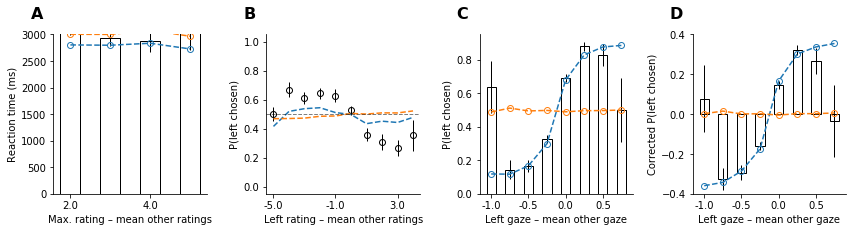

In [12]:
print('Close Figure to continue...')
glam.plot_fit(test_data, [glam_full.prediction,glam_nobias.prediction]);
plt.show()